# Task
For the next class you can do a small homework with the analysis of old and new ratings of top 250 'Kinopoisk' movies.
You need to check the following hypothesis:

  H0 - there is no statistical difference between rating_new and rating_old

  Ha - the difference between rating_new and rating_old exists

using Mann-Whitney U-test and Boostrap.

Compare the ratings of all the films ranked, then ratings of movies of a similar genre/decade of creating/country of origin and make the conclusions.

You may use a prepared dataset or parse the data yourself based on the example from the lecture. For the second option you will get more points (up to 5).

Place the link to your git hub repository here. The repo should contain your code and a text description of the hypothesis testing.

The task should be made individually.

In [28]:
from bs4 import BeautifulSoup
import pandas as pd
import requests


import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, mannwhitneyu
import seaborn as sns
from tqdm.auto import tqdm

plt.style.use('ggplot')

In [6]:
r = requests.get('https://www.kinopoisk.ru/lists/movies/top250/')
soup = BeautifulSoup(r.content, 'html.parser')

In [7]:
films=soup.findAll('div',class_='styles_root__ti07r')
data =[]
for film in films:
  name=film.find('a',class_='base-movie-main-info_link__YwtP1').find('span', class_='desktop-list-main-info_secondaryText__M_aus').text#.find('span', class_='desktop-list-main-info_secondaryText__M_aus')
  name_rus=film.find('div',class_='styles_content__nT2IG').find('span', class_='styles_mainTitle__IFQyZ styles_activeMovieTittle__kJdJj').text
  genre=film.find('div',class_='styles_content__nT2IG').findAll('span', class_='desktop-list-main-info_truncatedText__IMQRP')[0].text
  rating_new=film.find('div',class_='styles_rating__ni2L0 styles_root___s7Tg styles_rootMd__ZvdRj styles_rootPositive__PIwO2').text
  rating_old=film.find('div',class_='styles_user__2wZvH').find('div',class_='styles_rating__LU3_x').find('span',class_='styles_kinopoiskValuePositive__vOb2E styles_kinopoiskValue__9qXjg').text
  views=film.find('div',class_='styles_user__2wZvH').find('div',class_='styles_rating__LU3_x').find('span',class_='styles_kinopoiskCount__2_VPQ').text

  data.append([name,name_rus,genre,rating_new,rating_old,views])

In [8]:
data

[['The Green Mile, 1999, 189\xa0мин.',
  'Зеленая миля',
  'США • драма\xa0\xa0Режиссёр: Фрэнк Дарабонт',
  '9.1',
  '9.2',
  '121 696'],
 ["Schindler's List, 1993, 195\xa0мин.",
  'Список Шиндлера',
  'США • драма\xa0\xa0Режиссёр: Стивен Спилберг',
  '8.8',
  '9.1',
  '76 546'],
 ['The Shawshank Redemption, 1994, 142\xa0мин.',
  'Побег из Шоушенка',
  'США • драма\xa0\xa0Режиссёр: Фрэнк Дарабонт',
  '9.1',
  '9.0',
  '78 968'],
 ['Forrest Gump, 1994, 142\xa0мин.',
  'Форрест Гамп',
  'США • драма\xa0\xa0Режиссёр: Роберт Земекис',
  '8.9',
  '8.9',
  '105 316'],
 ['The Lord of the Rings: The Return of the King, 2003, 201\xa0мин.',
  'Властелин колец: Возвращение короля',
  'Новая Зеландия • фэнтези\xa0\xa0Режиссёр: Питер Джексон',
  '8.7',
  '8.9',
  '50 625'],
 ['The Lord of the Rings: The Fellowship of the Ring, 2001, 178\xa0мин.',
  'Властелин колец: Братство Кольца',
  'Новая Зеландия • фэнтези\xa0\xa0Режиссёр: Питер Джексон',
  '8.6',
  '8.8',
  '70 483'],
 ['The Lord of the Rings

In [9]:
header =['name','name_rus','genre','rating_new','rating_old','views']

In [10]:
df=pd.DataFrame(data,columns=header)
df.head()

,name,name_rus,genre,rating_new,rating_old,views
0,"The Green Mile, 1999, 189 мин.",Зеленая миля,США • драма Режиссёр: Фрэнк Дарабонт,9.1,9.2,121 696
1,"Schindler's List, 1993, 195 мин.",Список Шиндлера,США • драма Режиссёр: Стивен Спилберг,8.8,9.1,76 546
2,"The Shawshank Redemption, 1994, 142 мин.",Побег из Шоушенка,США • драма Режиссёр: Фрэнк Дарабонт,9.1,9.0,78 968
3,"Forrest Gump, 1994, 142 мин.",Форрест Гамп,США • драма Режиссёр: Роберт Земекис,8.9,8.9,105 316
4,"The Lord of the Rings: The Return of the King,...",Властелин колец: Возвращение короля,Новая Зеландия • фэнтези Режиссёр: Питер Джексон,8.7,8.9,50 625


# Mann Whitneyu

In [11]:
df.shape

(50, 6)

D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating_new', ylabel='Density'>

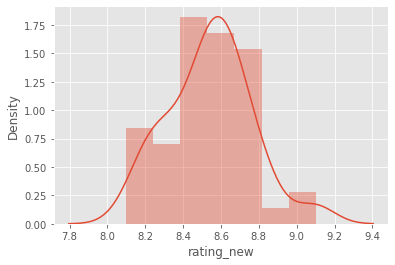

In [25]:
sns.distplot(df['rating_new'])

D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating_old', ylabel='Density'>

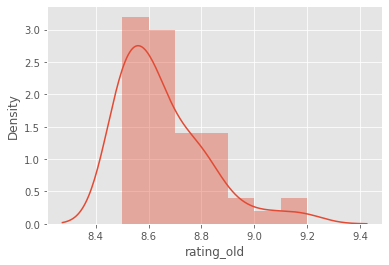

In [27]:
sns.distplot(df['rating_old'])

In [19]:
res=scipy.stats.mannwhitneyu(df['rating_new'],df['rating_old'])
print(res)

MannwhitneyuResult(statistic=904.5, pvalue=0.0076125639614991756)


AS p< 0.05, there is a statitstical importance and we can reject H0

# Bootstrap

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(data_column_1, data_column_2, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(boot_len, replace = True).values
        samples_2 = data_column_2.sample(boot_len, replace = True).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)      
        
    p_1 = norm.cdf(x = 0, loc = np.mean(boot_data), scale = np.std(boot_data))
    p_2 = norm.cdf(x = 0, loc = -np.mean(boot_data), scale = np.std(boot_data))
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    plt.style.use('ggplot')
    #plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    return {"p_value": p_value}

In [34]:
df.dtypes
df['rating_new'] = pd.to_numeric(df['rating_new'])
df['rating_old'] = pd.to_numeric(df['rating_old'])

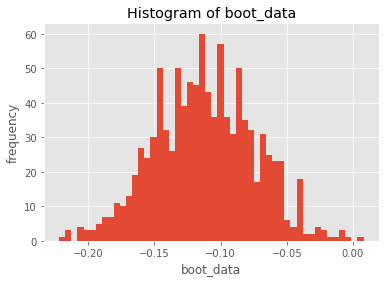

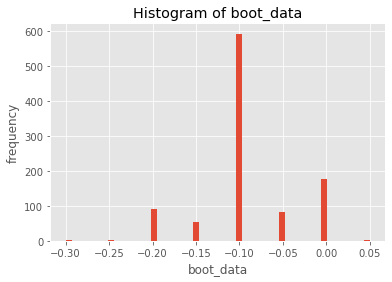

 Boot mean: 0.002915313050184488, Boot median: 0.10011619975195343, MW MannwhitneyuResult(statistic=904.5, pvalue=0.015225127922998351)


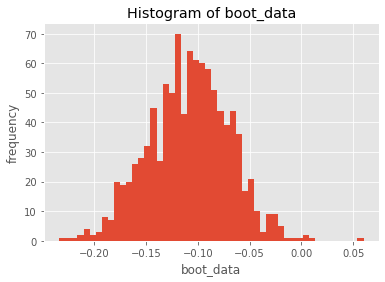

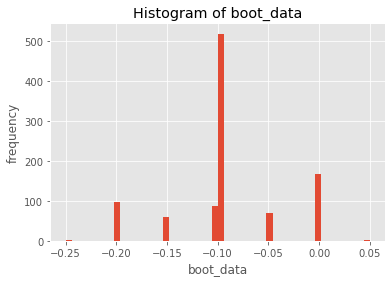

 Boot mean: 0.005546853822003189, Boot median: 0.08796137745657537, MW MannwhitneyuResult(statistic=904.5, pvalue=0.015225127922998351)


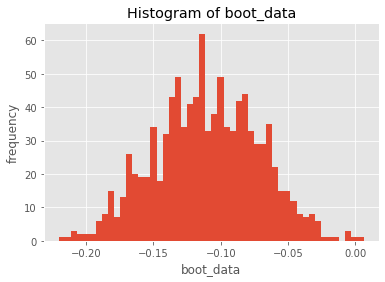

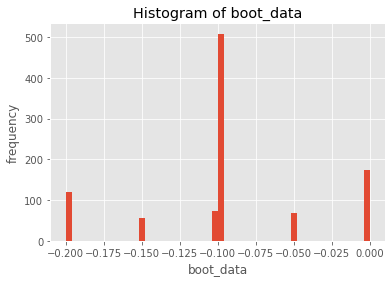

 Boot mean: 0.0042862007857807395, Boot median: 0.09700812167196611, MW MannwhitneyuResult(statistic=904.5, pvalue=0.015225127922998351)


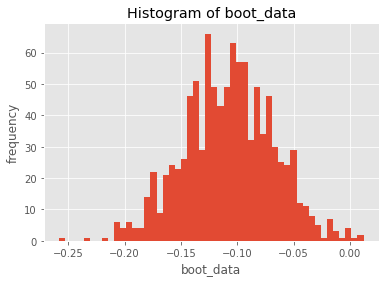

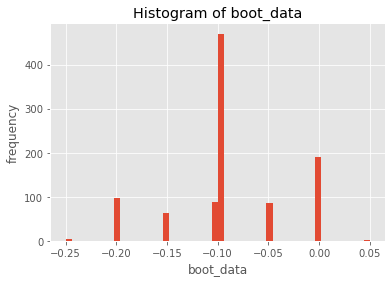

 Boot mean: 0.006720466427618579, Boot median: 0.11553178389184297, MW MannwhitneyuResult(statistic=904.5, pvalue=0.015225127922998351)


In [35]:
x = df.rating_new
y = df.rating_old

res_mw=mannwhitneyu(x, y, alternative = 'two-sided')

for i in range(4):
    bootMean=get_bootstrap(x, y)
    bootMedian=get_bootstrap(x, y, statistic = np.median)
    print(f' Boot mean: {bootMean["p_value"]}, Boot median: {bootMedian["p_value"]}, MW {res_mw}')

### Bootstrap results also show that there is a significant statistical difference and we reject H0